# This is a notebook that demonstrate the basic usage of `AstroPlasma`

## Ionization modeling

This is how one would use astro_plasma for calculating ionization state of a plasma. This would be useful in any modeling that depends on calculating ionization of the plasma. Determining temperautre from density, calculating the free electron density in the plasma are few such examples where `AstroPlasma` can find application.

In [1]:
# Import AstroPlasma Ionization module
from astro_plasma import Ionization
from astro_plasma.core.utils import AtmElement

### Let us calculate ionization fraction of $\bf{OVI\ (O^{5+}})$ 

In `AstroPlasma` elements are labelled by their atomic number.
- Atomic number of the desired element is passed to the `element` argument in several functions of `AstroPlasma`. For example, Oxygen corresponds to `element=8`.
- For the ionization state, `AstroPlasma` labels them according to the value passed to the `ion` argument. For example, ionization state III, corresponds to `ion=3`.
- Summarizing, to know the ionization state of $\bf{OVI}$, one needs to pass `element=8` and `ion=6`.

In [2]:
fIon = Ionization.interpolate_ion_frac

Now we are going to define typical physical values that characterizes an astrophysical plasma.

In [3]:
nH = 1.2e-04 # Hydrogen number density in cm^-3
temperature = 4.2e+05 # Temperature of the plasma in kelvin
metallicity = 0.99 # Metallicity of plasma with respect to solar
redshift = 0.001 # Cosmological redshift
mode = "CIE"

**Note**: The mode passed in the above code refers to the equilibrium state of the plasma. Right now, `AstroPlasma` only supports two equilibrium conditions, namely, *collisional ionization equilibrium* (`CIE` in code) and *photo-ionization equilibrium* (`PIE` in code). 

For *photo-ionization equilibrium*, the photo-ionizing backgrounds that are used in the calculation of the *Cloudy* interpolation tables are *Haardt-Madau (2012)* extra-galactic UV/X-ray diffuse background and *Cosmic Microwave Background (CMB)* at any given redshift.

In [4]:
# Lets get the ionization of OVI
element = AtmElement.Oxygen
ion = 6
fOVI = fIon(nH = nH,
            temperature = temperature,
            metallicity = metallicity,
            redshift = redshift,
            element = element,
            ion = ion,
            mode = mode,
            ) # This value is in log10
fOVI = pow(10, fOVI)
print(f"f_OVI = {fOVI:.3e}")

f_OVI = 9.463e-02


**Note**: 
- Ionization fraction returned by `AstroPlasma` is in **log10** scale. 
- As of now, we **do not** support vectorization of these functions and indivdual values must be passed and **not** arrays. This can lead to errors or un-defined behavior.

One can also caluculate other plasma quantities as follows

### The total free electron density

In [5]:
num_dens = Ionization.interpolate_num_dens

ne = num_dens(nH = nH,
              temperature = temperature,
              metallicity = metallicity,
              redshift = redshift,
              mode = mode,
              part_type = "electron",
              )
print(f"Free electron density = {ne:.3e} cm^-3")

Free electron density = 1.410e-04 cm^-3


In order to get **total particle number density**, use `part_type = "all"` and to get **total ion density**, use `part_type = "ion"`

In [6]:
num_dens = Ionization.interpolate_num_dens

n = num_dens(nH = nH,
              temperature = temperature,
              metallicity = metallicity,
              redshift = redshift,
              mode = mode,
              part_type = "all",
              )
ni = num_dens(nH = nH,
              temperature = temperature,
              metallicity = metallicity,
              redshift = redshift,
              mode = mode,
              part_type = "ion",
              )
print(f"Total particle density = {n:.3e} cm^-3")
print(f"Total ion density = {ni:.3e} cm^-3")

Total particle density = 2.714e-04 cm^-3
Total ion density = 1.072e-05 cm^-3


Although it is straightforward to obtain mean particle mass, we provide functions to so for the convenience of the user. We use the following relation for calculating these quantities.

$$\rho = n \mu m_p = n_e \mu_e m_p = n_i \mu_i m_p = n_H m_H X^{-1}$$

In [7]:
mean_mass = Ionization.interpolate_mu

mu = mean_mass(nH = nH,
               temperature = temperature,
               metallicity = metallicity,
               redshift = redshift,
               mode = mode,
               part_type = "all",
               )
mu_e = mean_mass(nH = nH,
               temperature = temperature,
               metallicity = metallicity,
               redshift = redshift,
               mode = mode,
               part_type = "electron",
               )
mu_i = mean_mass(nH = nH,
               temperature = temperature,
               metallicity = metallicity,
               redshift = redshift,
               mode = mode,
               part_type = "ion",
               )
print(f"Mean particle mass = {mu:.2f} mp")
print(f"Mean free electron mass = {mu_e:.2f} mp")
print(f"Mean ion mass = {mu_i:.2f} mp")

Mean particle mass = 0.62 mp
Mean free electron mass = 1.19 mp
Mean ion mass = 15.65 mp


## Emission spectrum

`AstroPlasma` can be used in determing the emission spectrum emitted from a *one-zone* plasma. Here's the code that does that. This can be used as a starting point for modeling plasma emission from astrophysical objects like the *circumgalactic medium* or *galaxy clusters* by stacking emission from multiple such one-zones.

In [8]:
# Import AstroPlasma EmissionSpectrum module
from astro_plasma import EmissionSpectrum

In [9]:
gen_spectrum = EmissionSpectrum.interpolate_spectrum

# Generate spectrum
spectrum = gen_spectrum(nH = nH,
               temperature = temperature,
               metallicity = metallicity,
               redshift = redshift,
               mode = mode
               )

Let us plot the spectrum generated by `AstroPlasma`

In [10]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

## Plot Styling for a pretty plot
page_style = "light"
matplotlib.rcParams["xtick.direction"] = "in"
matplotlib.rcParams["ytick.direction"] = "in"
matplotlib.rcParams["xtick.top"] = True
matplotlib.rcParams["ytick.right"] = True
matplotlib.rcParams["xtick.minor.visible"] = True
matplotlib.rcParams["xtick.labelcolor"] = "white" if page_style=="dark" else "black"
matplotlib.rcParams["ytick.minor.visible"] = True
matplotlib.rcParams["axes.grid"] = True
matplotlib.rcParams["grid.color"] = "white" if page_style=="dark" else "#b0b0b0"
matplotlib.rcParams["axes.edgecolor"] = "white" if page_style=="dark" else "black"
matplotlib.rcParams["lines.dash_capstyle"] = "round"
matplotlib.rcParams["lines.solid_capstyle"] = "round"
matplotlib.rcParams["legend.handletextpad"] = 0.4
matplotlib.rcParams["axes.linewidth"] = 0.8
matplotlib.rcParams["lines.linewidth"] = 1.0
matplotlib.rcParams["ytick.major.width"] = 0.6
matplotlib.rcParams["xtick.major.width"] = 0.6
matplotlib.rcParams["ytick.minor.width"] = 0.45
matplotlib.rcParams["xtick.minor.width"] = 0.45
matplotlib.rcParams["ytick.major.size"] = 4.0
matplotlib.rcParams["xtick.major.size"] = 4.0
matplotlib.rcParams["ytick.minor.size"] = 2.0
matplotlib.rcParams["xtick.minor.size"] = 2.0
matplotlib.rcParams["axes.labelcolor"] = "white" if page_style=="dark" else "black"
matplotlib.rcParams["xtick.labelcolor"] = "white" if page_style=="dark" else "black"
matplotlib.rcParams["ytick.labelcolor"] = "white" if page_style=="dark" else "black"
matplotlib.rcParams["xtick.color"] = "white" if page_style=="dark" else "black"
matplotlib.rcParams["ytick.color"] = "white" if page_style=="dark" else "black"
matplotlib.rcParams["legend.handlelength"] = 2
matplotlib.rcParams["figure.dpi"] = 200
matplotlib.rcParams["axes.axisbelow"] = True

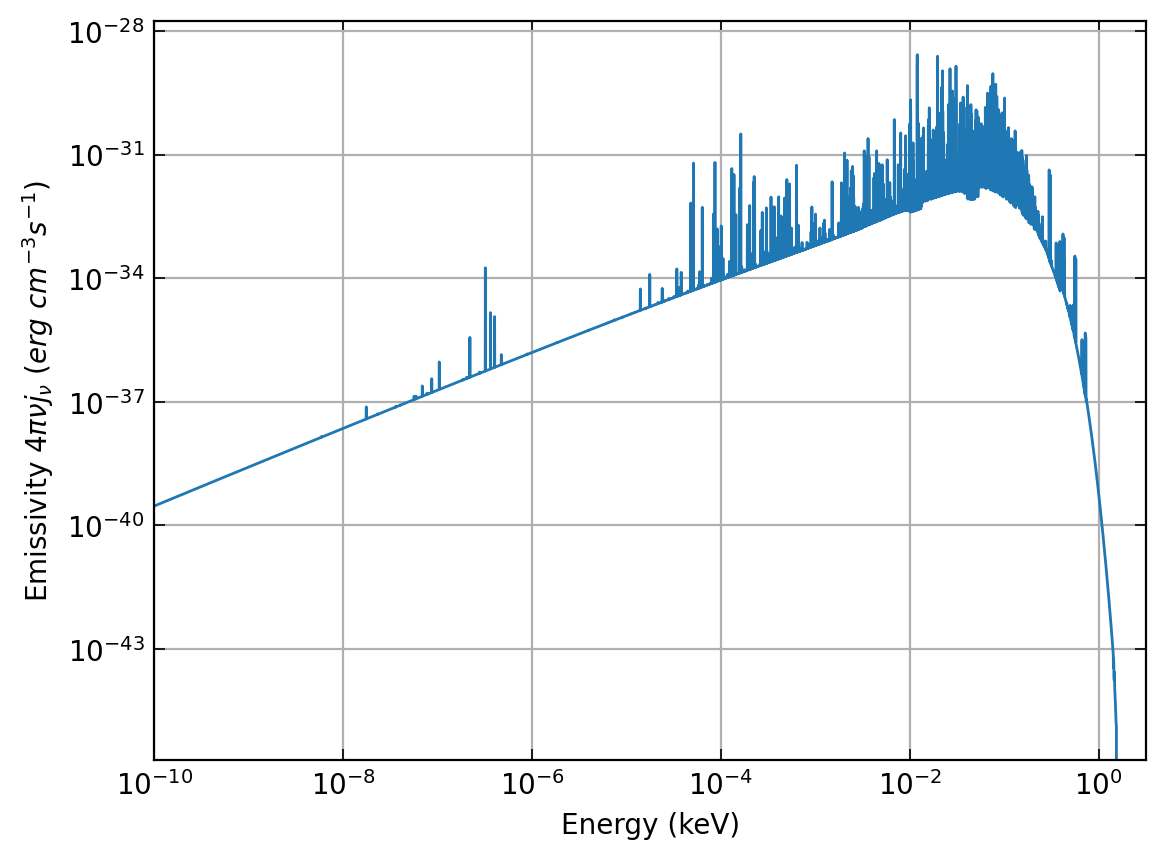

In [11]:
plt.loglog(spectrum[:,0], spectrum[:,1], color="tab:cyan" if page_style=="dark" else "tab:blue")
plt.xlabel(r"Energy (keV)")
plt.ylabel(r"Emissivity $4 \pi \nu j_{\nu}$ ($erg\ cm^{-3} s^{-1}$)")
plt.xlim(xmin = 1.0e-10, xmax=3.2)
plt.savefig(f"sample_spectrum_{page_style}.png", transparent=True)
plt.show()

> *Note*: `AstroPlasma` assumes by default that the data is located at `<module_location>/data/<ionization/emission>`.
The user can change this to something else by using `Ionization.base_dir = "<new_ionization_data_location_dir>"` or `EmissionSpectrum.base_dir = "<new_emission_data_location_dir>"`, where these new directories must contain the valid `hdf5` data files.